# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model

df = pd.read_csv('/Users/julianuss/Documents/GitHub/lab-neural-networks/your-code/tic-tac-toe.csv')
df.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [2]:
# Looking into the basic details of the DataFrame
print(df.info())
print(df.shape)
print(df.describe())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BR      958 non-null    object
 9   class   958 non-null    bool  
dtypes: bool(1), object(9)
memory usage: 68.4+ KB
None
(958, 10)
         TL   TM   TR   ML   MM   MR   BL   BM   BR class
count   958  958  958  958  958  958  958  958  958   958
unique    3    3    3    3    3    3    3    3    3     2
top       x    x    x    x    x    x    x    x    x  True
freq    418  378  418  378  458  378  418  378  418   626
Index(['TL', 'TM', 'TR', 'ML', 'MM', 'MR', 'BL', 'BM', 'BR', 'class'], dtype='object')


In [3]:
# One-hot-encoding
df = pd.get_dummies(df, drop_first=True)
df.head()


,class,TL_o,TL_x,TM_o,TM_x,TR_o,TR_x,ML_o,ML_x,MM_o,MM_x,MR_o,MR_x,BL_o,BL_x,BM_o,BM_x,BR_o,BR_x
0,True,False,True,False,True,False,True,False,True,True,False,True,False,False,True,True,False,True,False
1,True,False,True,False,True,False,True,False,True,True,False,True,False,True,False,False,True,True,False
2,True,False,True,False,True,False,True,False,True,True,False,True,False,True,False,True,False,False,True
3,True,False,True,False,True,False,True,False,True,True,False,True,False,True,False,False,False,False,False
4,True,False,True,False,True,False,True,False,True,True,False,True,False,False,False,True,False,False,False


In [4]:
# Seperating input and output
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]

In [5]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert back to a DataFrame if needed
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Display the normalized input data and the target data
print("Normalized Input Data:")
print(X_normalized_df.head())

print("\nOutput:")
print(y.head())

Normalized Input Data:
      class      TL_o      TL_x      TM_o      TM_x      TR_o      TR_x  \
0  0.728252 -0.733294  1.136603 -0.724898  1.238706 -0.733294  1.136603   
1  0.728252 -0.733294  1.136603 -0.724898  1.238706 -0.733294  1.136603   
2  0.728252 -0.733294  1.136603 -0.724898  1.238706 -0.733294  1.136603   
3  0.728252 -0.733294  1.136603 -0.724898  1.238706 -0.733294  1.136603   
4  0.728252 -0.733294  1.136603 -0.724898  1.238706 -0.733294  1.136603   

       ML_o      ML_x      MM_o      MM_x      MR_o      MR_x      BL_o  \
0 -0.724898  1.238706  1.348201 -0.957079  1.379504 -0.807294 -0.733294   
1 -0.724898  1.238706  1.348201 -0.957079  1.379504 -0.807294  1.363709   
2 -0.724898  1.238706  1.348201 -0.957079  1.379504 -0.807294  1.363709   
3 -0.724898  1.238706  1.348201 -0.957079  1.379504 -0.807294  1.363709   
4 -0.724898  1.238706  1.348201 -0.957079  1.379504 -0.807294 -0.733294   

       BL_x      BM_o      BM_x      BR_o  
0  1.136603  1.379504 -0.807294

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [6]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = Sequential()

# Adding multiple layers
input_dim = X_train.shape[1]  # Number of features
model.add(Dense(128, input_dim=input_dim, activation='relu'))  # First hidden layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(32, activation='relu'))  # Third hidden layer
model.add(Dense(16, activation='relu'))  # Fourth hidden layer

# Output layer with softmax for multi-class classification
model.add(Dense(len(set(y)), activation='softmax'))  # Output layer for multi-class

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluating the model with the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5176 - loss: 0.6804 - val_accuracy: 0.6623 - val_loss: 0.6176
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7287 - loss: 0.5515 - val_accuracy: 0.8442 - val_loss: 0.4510
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8780 - loss: 0.3752 - val_accuracy: 0.8766 - val_loss: 0.3276
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9064 - loss: 0.2460 - val_accuracy: 0.9481 - val_loss: 0.2144
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9701 - loss: 0.1678 - val_accuracy: 0.9740 - val_loss: 0.1692
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9846 - loss: 0.1156 - val_accuracy: 0.9740 - val_loss: 0.1085
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9961 - loss: 0.0541 - val_accuracy: 0.9870 - val_loss: 0.0875
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9983 - loss: 0.0350 - val_accuracy: 0.9935 - val_loss: 0.0397
Epo

In [20]:
# Saving the model
model.save('tic-tac-toe.keras')
print("Model saved as 'tic-tac-toe.keras'")

Model saved as 'tic-tac-toe.keras'


## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [25]:
# Ensuring X_test has no NaN values and reset index
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Selecting 5 random rows from the test dataset 
random_indices = np.random.choice(X_test.index, size=5, replace=False)

# Using .iloc to select rows by position
X_sample = X_test.iloc[random_indices]
y_sample = y_test.iloc[random_indices]

# Checking for NaN values in the selected sample
print("\nChecking X_sample for NaN values:")
print(X_sample.isnull().sum())

# Making predictions on the selected rows
predictions = model.predict(X_sample)

# Rounding the sigmoid outputs probabilities to 0 or 1
predicted_classes = (predictions > 0.5).astype(int)

# Comparing predictions with actual values
print("\nActual values:    ", y_sample.values)
print("Predicted values: ", predicted_classes.flatten())

print("\nSample data used for predictions:")
print(X_sample)


Checking X_sample for NaN values:
class    0
TL_o     0
TL_x     0
TM_o     0
TM_x     0
TR_o     0
TR_x     0
ML_o     0
ML_x     0
MM_o     0
MM_x     0
MR_o     0
MR_x     0
BL_o     0
BL_x     0
BM_o     0
BM_x     0
BR_o     0
dtype: int64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Actual values:     [ True False  True  True False]
Predicted values:  [0 1 1 0 0 1 0 1 1 0]

Sample data used for predictions:
     class   TL_o   TL_x   TM_o   TM_x   TR_o   TR_x   ML_o   ML_x   MM_o  \
168   True  False   True   True  False  False   True  False  False  False   
26    True  False   True  False  False  False   True   True  False  False   
167   True  False   True  False   True  False   True  False  False   True   
112   True  False  False  False  False   True  False   True  False   True   
169   True  False   True   True  False  False  False  False   True   True   

      MM_x   MR_o   MR_x   BL_o   BL_x   BM_o   BM_x   BR_o  
168   True  False  False   True  False   True  False  False  
2

## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [33]:
model = Sequential()

# Input layer
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))  # Another layer
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Adding one more layer here (new hidden layer)
model.add(Dense(8, activation='relu'))  # Additional layer

# Output layer 
model.add(Dense(1, activation='sigmoid'))

# Adjusting the learning rate for the Adam optimizer
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compiling the model with binary_crossentropy
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
epochs = 100
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.2)

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Saving the model
model.save('tic-tac-toe-improved-model.keras')


Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6065 - loss: 0.6805 - val_accuracy: 0.7013 - val_loss: 0.6264
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7617 - loss: 0.5793 - val_accuracy: 0.8701 - val_loss: 0.4014
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8865 - loss: 0.3323 - val_accuracy: 0.8896 - val_loss: 0.2737
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9499 - loss: 0.1873 - val_accuracy: 0.9351 - val_loss: 0.1602
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9795 - loss: 0.0867 - val_accuracy: 0.9416 - val_loss: 0.1781
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9925 - loss: 0.0480 - val_accuracy: 0.9675 - val_loss: 0.1030
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9952 - loss: 0.0362 - val_accuracy: 0.9740 - val_loss: 0.0985
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9961 - loss: 0.0256 - val_accuracy: 0.9805 - val_loss: 0.0

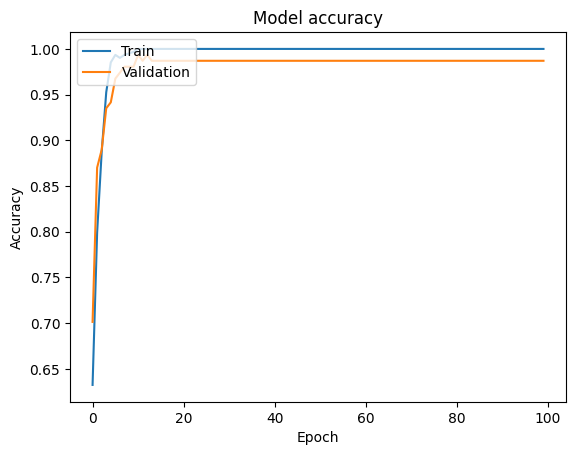

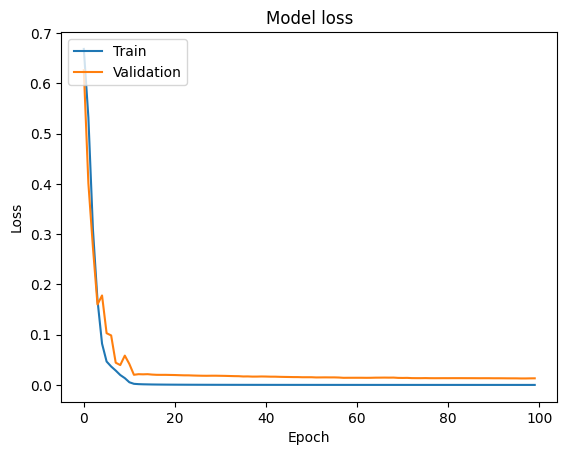

In [34]:
# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [35]:
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Adjusting the learning rate for the Adam optimizer
learning_rate = 0.0001  # Decreased learning rate for finer updates
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compiling the model with binary_crossentropy (for binary classification)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with reduced epochs and batch size
epochs = 50  # Reducing the epochs for better generalization
history = model.fit(X_train, y_train, epochs=epochs, batch_size=16, validation_split=0.2)

# Evaluating the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Saving the model
model.save('tic-tac-toe-improved-model.keras')

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6184 - loss: 0.6805 - val_accuracy: 0.5779 - val_loss: 0.6859
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.6484 - loss: 0.6676 - val_accuracy: 0.5649 - val_loss: 0.6808
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.6406 - loss: 0.6612 - val_accuracy: 0.5779 - val_loss: 0.6744
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.6221 - loss: 0.6544 - val_accuracy: 0.5844 - val_loss: 0.6668
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.6617 - loss: 0.6433 - val_accuracy: 0.5974 - val_loss: 0.6583
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.6779 - loss: 0.6292 - val_accuracy: 0.6039 - val_loss: 0.6490
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.6808 - loss: 0.6193 - val_accuracy: 0.5974 - val_loss: 0.6374
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.7348 - loss: 0.5986 - val_accuracy: 0.6299 - val_lo

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Building the improved model
model = Sequential()

# Input layer and first hidden layer with batch normalization and dropout
input_dim = X_train.shape[1]  # Number of features
model.add(Dense(128, input_dim=input_dim, activation='relu'))
model.add(BatchNormalization())  # Batch normalization to stabilize learning
model.add(Dropout(0.3))  # Adding dropout to prevent overfitting

# Second hidden layer
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Third hidden layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fourth hidden layer
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer with softmax for multi-class classification
model.add(Dense(len(set(y_train)), activation='softmax'))

# Compiling the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model with more epochs
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluating the model with the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Saving the model
model.save('tic-tac-toe-regularized-model.keras')

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4951 - loss: 1.2963 - val_accuracy: 0.5260 - val_loss: 0.6900
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5042 - loss: 1.3362 - val_accuracy: 0.5130 - val_loss: 0.6919
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4928 - loss: 1.2175 - val_accuracy: 0.5000 - val_loss: 0.7011
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5009 - loss: 1.2978 - val_accuracy: 0.5000 - val_loss: 0.7096
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4794 - loss: 1.2106 - val_accuracy: 0.5000 - val_loss: 0.7194
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5510 - loss: 1.1122 - val_accuracy: 0.5000 - val_loss: 0.7236
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5267 - loss: 1.0652 - val_accuracy: 0.5065 - val_loss: 0.7251
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5022 - loss: 1.1823 - val_accuracy: 0.5065 - val_loss: 0.7

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Building the simpler model
model = Sequential()

# Input layer and first hidden layer
input_dim = X_train.shape[1]  # Number of features
model.add(Dense(64, input_dim=input_dim, activation='relu'))  # First hidden layer

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer with softmax for multi-class classification
model.add(Dense(len(set(y_train)), activation='softmax'))

# Compiling the model
optimizer = Adam(learning_rate=0.001)  # Slightly higher learning rate
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluating the model with the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Saving the model
model.save('simplified-tic-tac-toe-model.keras')

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5305 - loss: 0.6882 - val_accuracy: 0.5714 - val_loss: 0.6318
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7023 - loss: 0.5451 - val_accuracy: 0.7468 - val_loss: 0.5222
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7712 - loss: 0.4679 - val_accuracy: 0.7922 - val_loss: 0.4665
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7996 - loss: 0.4064 - val_accuracy: 0.8247 - val_loss: 0.4126
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8346 - loss: 0.3531 - val_accuracy: 0.7727 - val_loss: 0.4211
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8527 - loss: 0.3478 - val_accuracy: 0.8442 - val_loss: 0.3475
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8786 - loss: 0.3096 - val_accuracy: 0.8377 - val_loss: 0.3409
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8743 - loss: 0.2736 - val_accuracy: 0.8831 - val_loss: 0.3405
Epo

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Building the refined model
model = Sequential()

# Input layer and first hidden layer with Batch Normalization
input_dim = X_train.shape[1]  # Number of features
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(BatchNormalization())  # Batch Normalization layer

# Second hidden layer with Dropout
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Output layer with softmax for multi-class classification
model.add(Dense(len(set(y_train)), activation='softmax'))

# Compiling the model
optimizer = Adam(learning_rate=0.001)  # Starting learning rate
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Evaluating the model with the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Saving the model
model.save('refined-tic-tac-toe-model.keras')

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4379 - loss: 1.2212 - val_accuracy: 0.7078 - val_loss: 0.6450 - learning_rate: 0.0010
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6460 - loss: 0.6908 - val_accuracy: 0.5844 - val_loss: 0.6205 - learning_rate: 0.0010
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7315 - loss: 0.5193 - val_accuracy: 0.5779 - val_loss: 0.5994 - learning_rate: 0.0010
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8079 - loss: 0.4296 - val_accuracy: 0.6039 - val_loss: 0.5840 - learning_rate: 0.0010
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8472 - loss: 0.3503 - val_accuracy: 0.6104 - val_loss: 0.5674 - learning_rate: 0.0010
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8289 - loss: 0.3779 - val_accuracy: 0.6104 - val_loss: 0.5578 - learning_rate: 0.0010
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8741 - loss: 0.2905 - val_accuracy: 0.6169 - va

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Building the further refined model
model = Sequential()

# Input layer and first hidden layer with Batch Normalization
input_dim = X_train.shape[1]  # Number of features
model.add(Dense(128, input_dim=input_dim, activation='relu'))  # Increased neurons to 128
model.add(BatchNormalization())  # Batch Normalization layer

# Second hidden layer with Dropout
model.add(Dense(64, activation='relu'))  # Increased neurons to 64
model.add(BatchNormalization())
model.add(Dropout(0.4))  # Increased dropout rate to 40%

# Third hidden layer with Dropout
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fourth hidden layer
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())

# Output layer with softmax for multi-class classification
model.add(Dense(len(set(y_train)), activation='softmax'))

# Compiling the model
optimizer = Adam(learning_rate=0.0005)  # Lowered learning rate to 0.0005
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=6, min_lr=0.00001)

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Evaluating the model with the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Saving the model
model.save('further-refined-tic-tac-toe-model.keras')

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5539 - loss: 1.1447 - val_accuracy: 0.5649 - val_loss: 0.6917 - learning_rate: 5.0000e-04
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6255 - loss: 0.8505 - val_accuracy: 0.6623 - val_loss: 0.6555 - learning_rate: 5.0000e-04
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6533 - loss: 0.7465 - val_accuracy: 0.6818 - val_loss: 0.6303 - learning_rate: 5.0000e-04
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7261 - loss: 0.6016 - val_accuracy: 0.6818 - val_loss: 0.6100 - learning_rate: 5.0000e-04
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6788 - loss: 0.6181 - val_accuracy: 0.7208 - val_loss: 0.5909 - learning_rate: 5.0000e-04
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7429 - loss: 0.5287 - val_accuracy: 0.7273 - val_loss: 0.5670 - learning_rate: 5.0000e-04
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7520 - loss: 0.53

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Building the refined model
model = Sequential()

# Input layer and hidden layers
input_dim = X_train.shape[1]  # Number of features
model.add(Dense(128, input_dim=input_dim, activation='relu'))  # First hidden layer
model.add(Dropout(0.3))  # Dropout to prevent overfitting

model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))  # Third hidden layer
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))  # Fourth hidden layer

# Output layer with softmax for multi-class classification
model.add(Dense(len(set(y_train)), activation='softmax'))

# Compiling the model
optimizer = Adam(learning_rate=0.0005)  # Lowered learning rate
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Training the model
history = model.fit(X_train, y_train, epochs=80, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Evaluating the model with the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Saving the model
model.save('refined-tic-tac-toe-model.keras')

Epoch 1/80


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5644 - loss: 0.6863 - val_accuracy: 0.5065 - val_loss: 0.6526 - learning_rate: 5.0000e-04
Epoch 2/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6009 - loss: 0.6374 - val_accuracy: 0.5325 - val_loss: 0.6179 - learning_rate: 5.0000e-04
Epoch 3/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6252 - loss: 0.6084 - val_accuracy: 0.5909 - val_loss: 0.5742 - learning_rate: 5.0000e-04
Epoch 4/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6711 - loss: 0.5513 - val_accuracy: 0.7468 - val_loss: 0.5136 - learning_rate: 5.0000e-04
Epoch 5/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7159 - loss: 0.5143 - val_accuracy: 0.8312 - val_loss: 0.4515 - learning_rate: 5.0000e-04
Epoch 6/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7767 - loss: 0.4743 - val_accuracy: 0.8766 - val_loss: 0.3923 - learning_rate: 5.0000e-04
Epoch 7/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7679 - loss: 0.4411 - v

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Building the refined model
model = Sequential()

# Input layer and hidden layers
input_dim = X_train.shape[1]  # Number of features
model.add(Dense(128, input_dim=input_dim))  # First hidden layer
model.add(LeakyReLU(alpha=0.1))  # Using LeakyReLU instead of ReLU
model.add(Dropout(0.4))  # Slightly increased dropout

model.add(Dense(64))  # Second hidden layer
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))  # Third hidden layer
model.add(Dropout(0.3))

model.add(Dense(16, activation='relu'))  # Fourth hidden layer
model.add(Dropout(0.2))

model.add(Dense(8, activation='relu'))  # Fifth hidden layer (new)
model.add(Dropout(0.2))

# Output layer with softmax for multi-class classification
model.add(Dense(len(set(y_train)), activation='softmax'))

# Compiling the model
optimizer = Adam(learning_rate=0.0003)  # Slightly reduced learning rate
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Training the model with a smaller batch size
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Evaluating the model with the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Saving the model
model.save('refined-tic-tac-toe-model-v2.keras')

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5538 - loss: 0.6774 - val_accuracy: 0.5390 - val_loss: 0.6836 - learning_rate: 3.0000e-04
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5662 - loss: 0.6663 - val_accuracy: 0.5065 - val_loss: 0.6733 - learning_rate: 3.0000e-04
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5850 - loss: 0.6742 - val_accuracy: 0.5065 - val_loss: 0.6597 - learning_rate: 3.0000e-04
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5526 - loss: 0.6686 - val_accuracy: 0.5000 - val_loss: 0.6466 - learning_rate: 3.0000e-04
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5866 - loss: 0.6441 - val_accuracy: 0.5130 - val_loss: 0.6335 - learning_rate: 3.0000e-04
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5789 - loss: 0.6397 - val_accuracy: 0.5000 - val_loss: 0.6178 - learning_rate: 3.0000e-04
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5891 - loss: 0.61

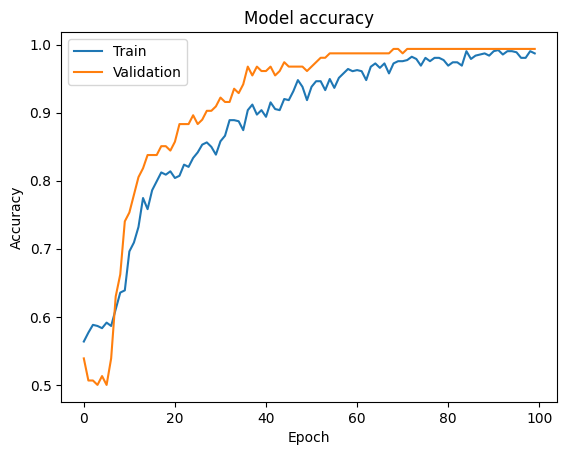

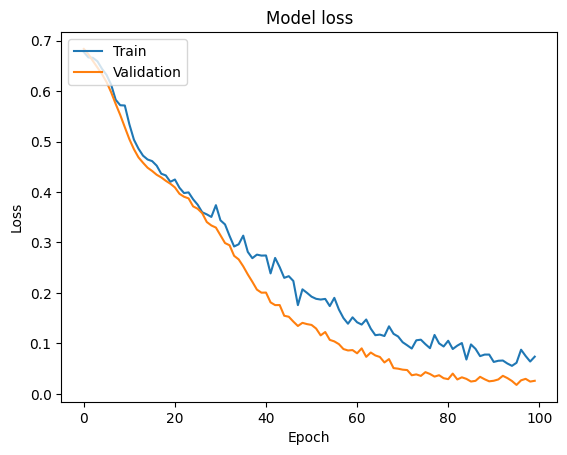

In [42]:
# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Which approach(es) did you find helpful to improve your model performance?**

Adding layers actually did not help in the beginning, so I tried a lot that I changed like lowering the learning rate (better convergence), increasing depth and dropout and lowering the batch sizes.
In the end it worked well with 99.48% with 5 batches, learning rate of 0.0003 and batch size of 16.